# Import Library

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure

## Probability

Here, we plot several common continuous distributions.
- normal distribution
- exponential distribution
- gamma distribution
- beta distribution

### Uniform Distribution

The probability density function of the uniform distribution is $$f(x,L) = \frac{1}{L}\hspace{0.1in}\text{ for }L\geq x\geq 0$$
For cumulative density function, 
$$ F(x) = x/L \text{ for }L\geq x\geq 0 $$

## Gaussian/Normal Distribution

The probability density function of the Gaussian distribution is $$f(x,\mu,\sigma) = \frac{1}{\sqrt{2\pi}}e^{-(x-\mu)^{2}/(2\sigma^{2})}.$$ The standard normal distribution means that $\sigma=1$. For cumulative density function, people usually define
$$ \Phi (a) = \int^{a}_{-\infty} \frac{1}{\sqrt{2\pi}} e^{-(x-\mu)^{2}/(2\sigma^{2})}dx $$

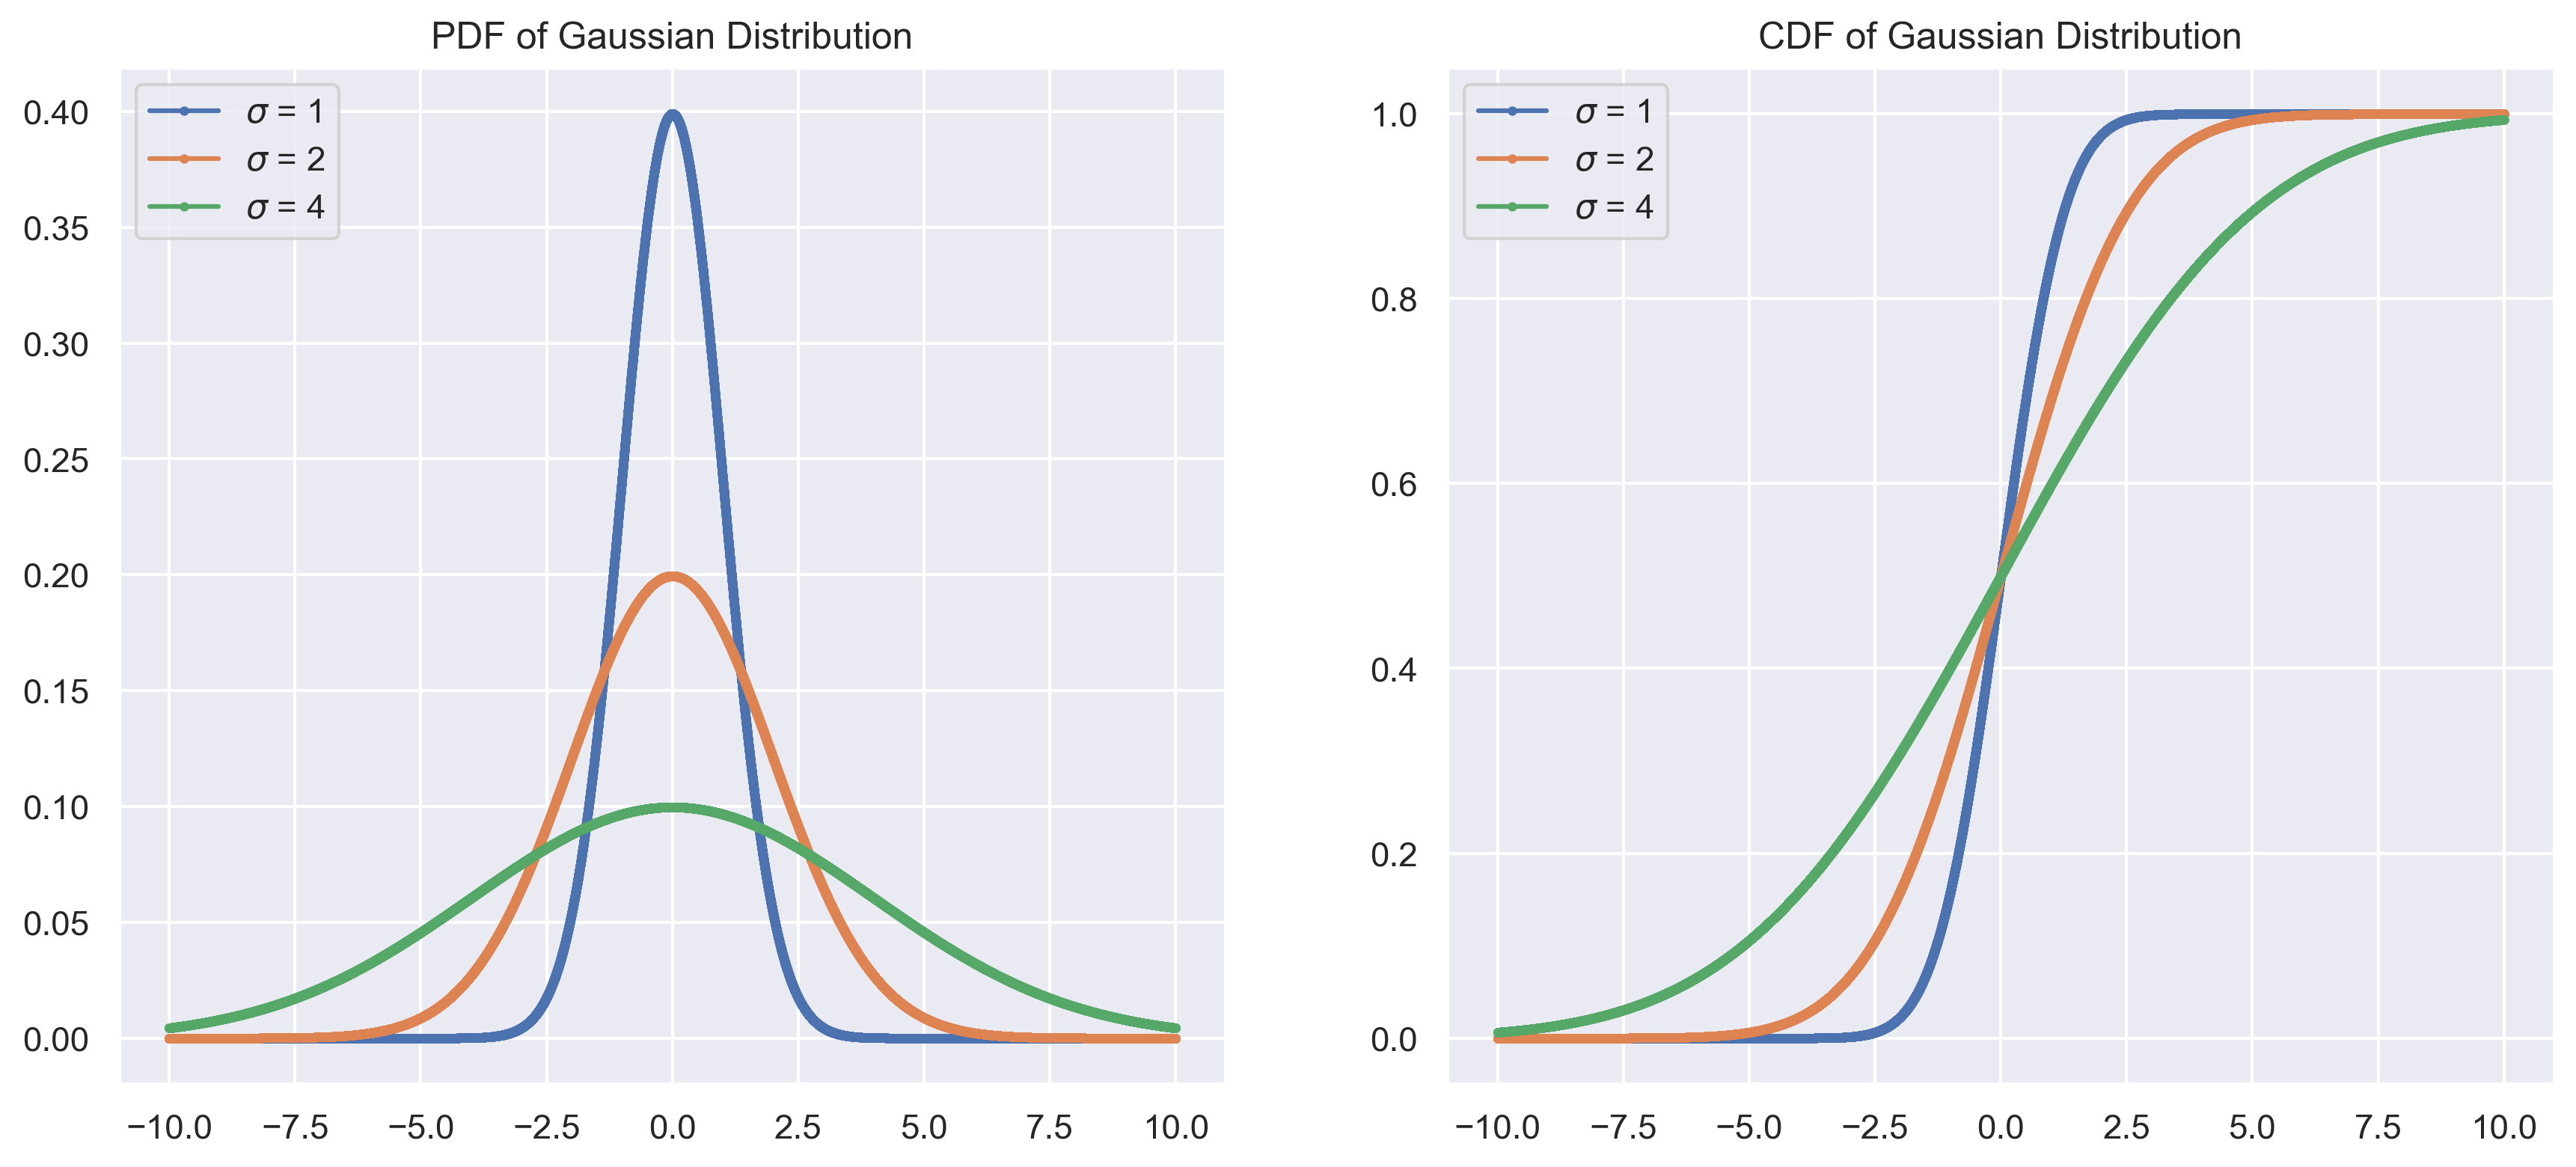

In [13]:
from scipy.stats import norm


sns.set_theme()
x_axis = np.arange(-10, 10, 0.001)
figure(figsize=(14, 6), dpi=300)

plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(x_axis, norm.pdf(x_axis,0,1), label='$\sigma$ = 1', marker='o', markersize=2)
plt.plot(x_axis, norm.pdf(x_axis,0,2), label='$\sigma$ = 2', marker='o', markersize=2)
plt.plot(x_axis, norm.pdf(x_axis,0,4), label='$\sigma$ = 4', marker='o', markersize=2)
plt.title("PDF of Gaussian Distribution")
plt.legend(loc="upper left")


plt.subplot(1, 2, 2) # index 2
plt.plot(x_axis, norm.cdf(x_axis,0,1), label='$\sigma$ = 1', marker='o', markersize=2)
plt.plot(x_axis, norm.cdf(x_axis,0,2), label='$\sigma$ = 2', marker='o', markersize=2)
plt.plot(x_axis, norm.cdf(x_axis,0,4), label='$\sigma$ = 4', marker='o', markersize=2)
plt.title("CDF of Gaussian Distribution")
plt.legend(loc="upper left")


plt.show()

## Exponential Distribution

### PDF and CDF

The PDF of exponential distribution is $$f(x, \lambda) = \lambda e^{-\lambda x}\hspace{0.1in}\text{ for } x\geq 0.$$ The CDF result is $1 - e^{-\lambda a}.$

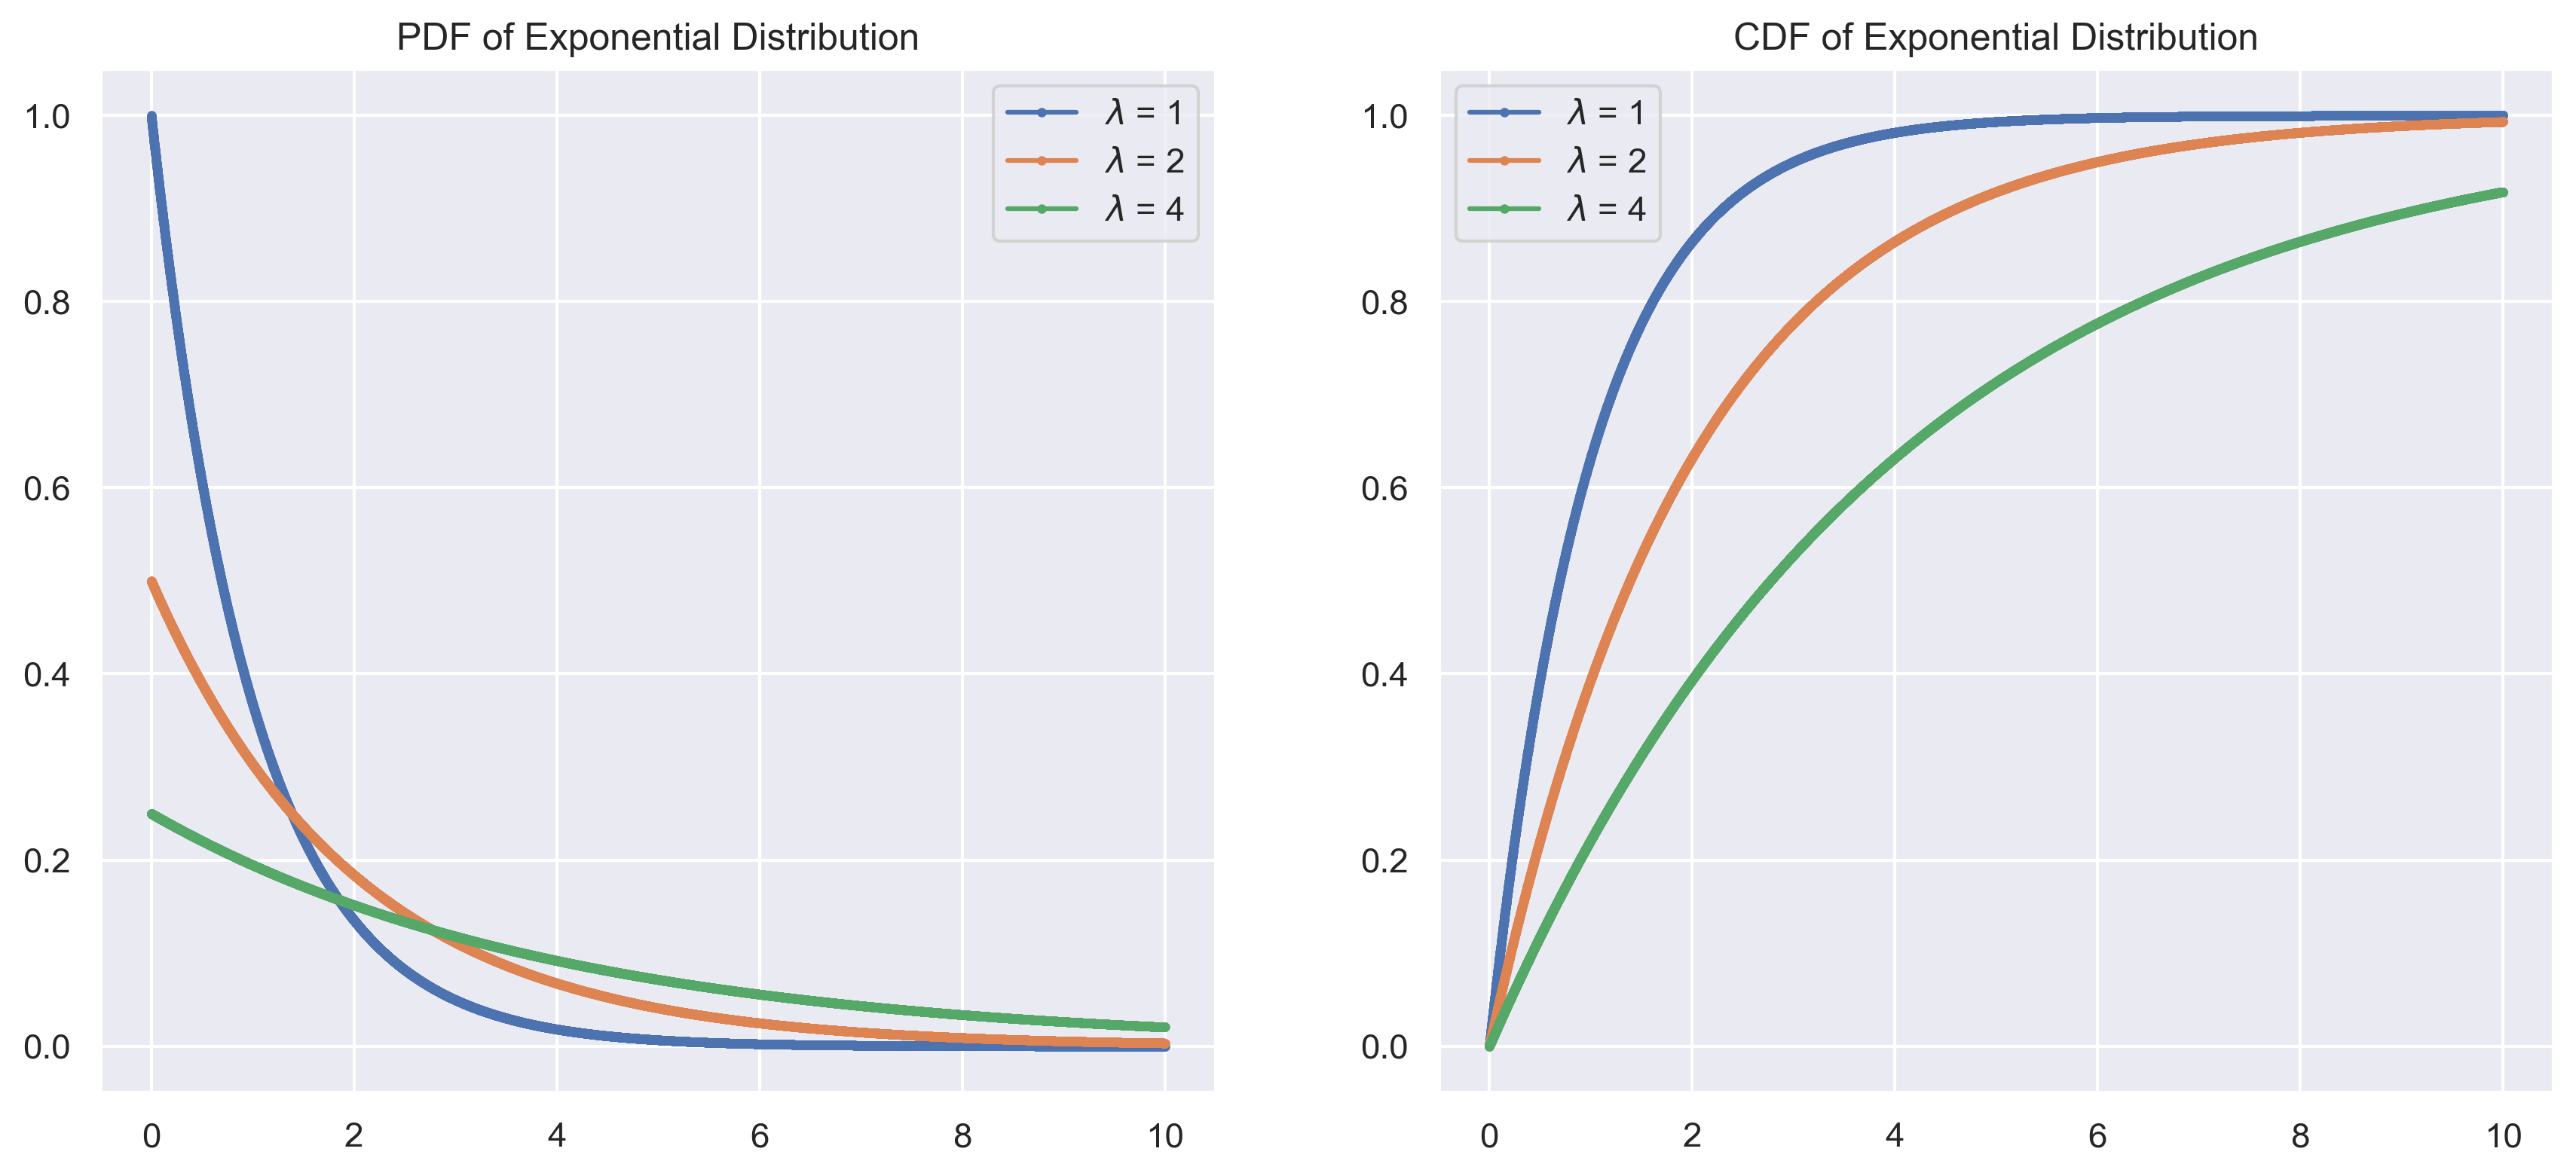

In [14]:
from scipy.stats import expon
sns.set_theme()
x_axis = np.arange(0, 10, 0.001)
plt.figure(figsize=(14, 6), dpi=300)

plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(x_axis, expon.pdf(x_axis,0,1), label='$\lambda$ = 1', marker='o', markersize=2)
plt.plot(x_axis, expon.pdf(x_axis,0,2), label='$\lambda$ = 2', marker='o', markersize=2)
plt.plot(x_axis, expon.pdf(x_axis,0,4), label='$\lambda$ = 4', marker='o', markersize=2)
plt.title("PDF of Exponential Distribution")
plt.legend(loc="upper right")


plt.subplot(1, 2, 2) # index 2
plt.plot(x_axis, expon.cdf(x_axis,0,1), label='$\lambda$ = 1', marker='o', markersize=2)
plt.plot(x_axis, expon.cdf(x_axis,0,2), label='$\lambda$ = 2', marker='o', markersize=2)
plt.plot(x_axis, expon.cdf(x_axis,0,4), label='$\lambda$ = 4', marker='o', markersize=2)
plt.title("CDF of Exponential Distribution")
plt.legend(loc="upper left")


plt.show()

### Point Estimate

The parameter in exponential distribution is the decaying constant $\lambda$ which can be estimated from MLE as
$$\lambda = N^{-1}\sum_{i}X_{i}$$

In [15]:
def expo_random(lam, n_ran):

#    function which generates random numbers from exponential distribution
#    lam: the decaying constant in the exponential distribution
#    n_ran: the number of generated random numbers
 
    n_times = 100
    ans_tmp = []
    for i in range(n_times):
        tmp = np.random.exponential(lam,n_ran)
        ans_tmp.append(np.sum(tmp)/len(tmp))
    return [np.mean(ans_tmp), np.sqrt(np.var(ans_tmp))]

In [16]:
lam = 7.5
y_estimate = []
y_estimate_var = []
for ii in np.logspace(1,4,num=100):
    tmp = expo_random(7.5,int(ii))
    y_estimate.append(tmp[0])
    y_estimate_var.append(tmp[1])

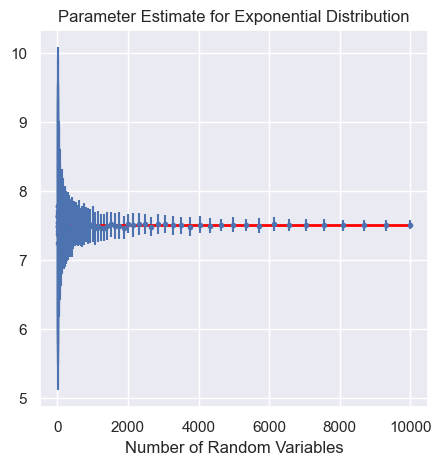

In [17]:
figure(figsize=(5, 5), dpi=100)
plt.title("Parameter Estimate for Exponential Distribution")
plt.xlabel('Number of Random Variables')
plt.errorbar(x=np.logspace(1,4,100), y=y_estimate, yerr=y_estimate_var,fmt='o',ms=3)
plt.hlines(xmin=10, xmax=10000,
           y=lam,
           linewidth=2.0,
           color="red")

## Statistical Test

### one-sample t-test

Purpose: determine whether an unknown population is different from a specific value

Assumptions:
1. continuous data values
2. independent/not correlated data points
3. no significant outliers
4. the dataset is "approximately" normal distributed

In [18]:
NN_sample = 1000
mean1 = 0.
p_value_list = []
for ii in range(10000):
    t_statistics,p_value = stats.ttest_1samp(np.random.normal(mean1,1,NN_sample), popmean=0)
    p_value_list.append(p_value)
# print(f'p value={p_value:.2f}')

<AxesSubplot:ylabel='Proportion'>

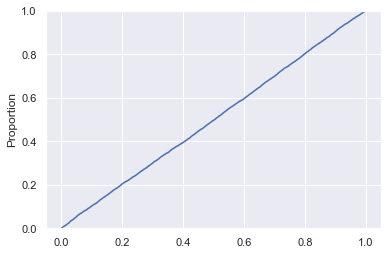

In [19]:
sns.ecdfplot(p_value_list)

### Two-sample Z-test

In [20]:
sample1 = 100
mean1 = 30
var1 = 1000
sample2 = 1000
mean2 = 20
var2 = 10

In [21]:
list1 = np.random.normal(mean1,var1,sample1)
list2 = np.random.normal(mean2,var2,sample2)

In [22]:
from statsmodels.stats.weightstats import ztest 
ztest(list1,list2, value=10)

(4.113028490506488, 3.905021704785845e-05)